In [164]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [165]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [166]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [167]:
train.shape

(891, 12)

In [168]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [169]:
test.shape

(418, 11)

In [170]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [171]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [172]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [173]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [174]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

(0, 100)

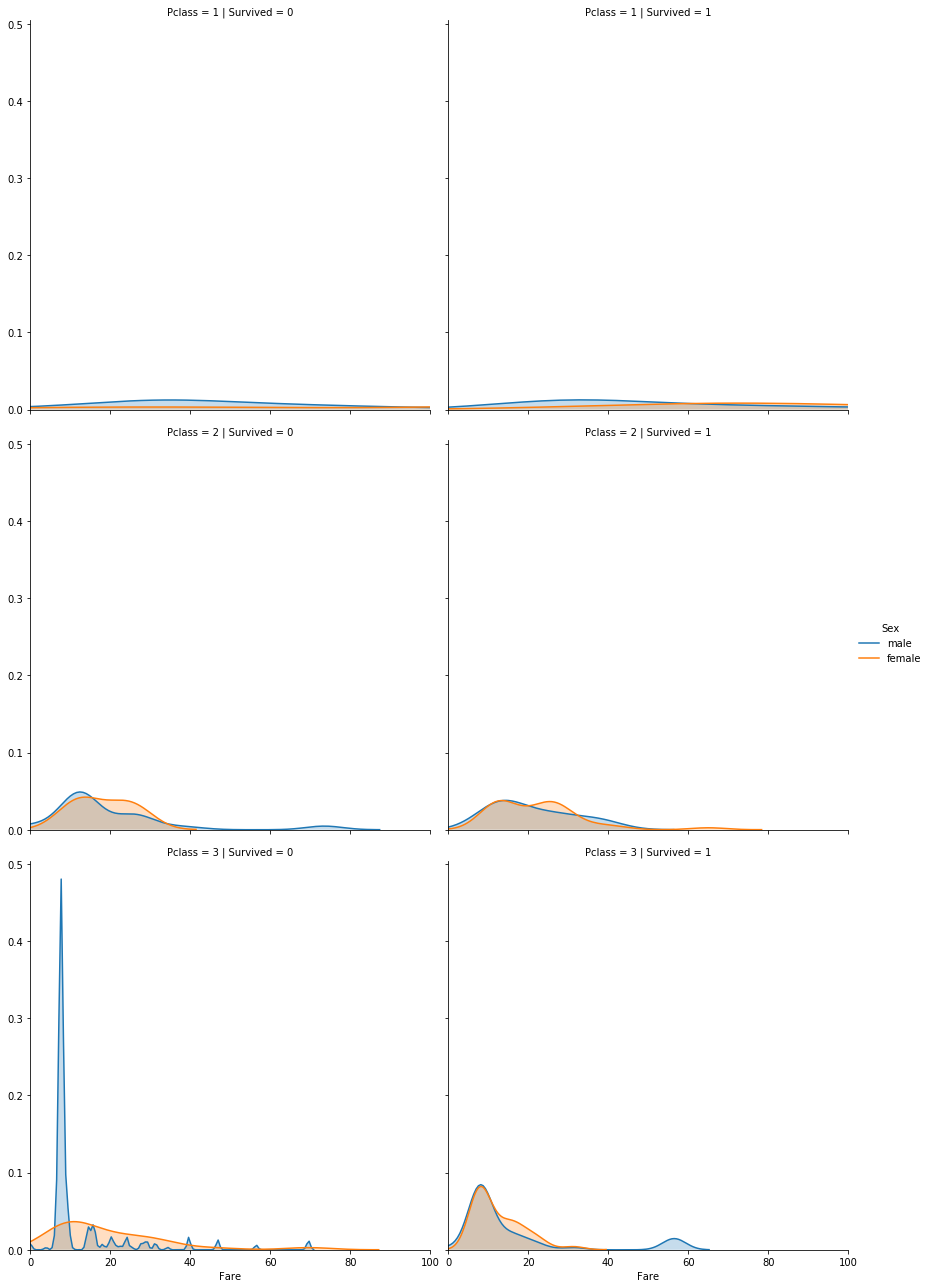

In [175]:
g = sns.FacetGrid(train,col ="Survived",row = "Pclass",hue = "Sex",height = 6)
g.map(sns.kdeplot,"Fare",shade=True)
g.add_legend()
plt.xlim(0,100)

In [176]:
train_copy = train.copy()

In [177]:
test_copy = test.copy()

In [178]:
train_test_data = [train_copy, test_copy]

In [179]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train_copy['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Don           1
Lady          1
Countess      1
Jonkheer      1
Mme           1
Sir           1
Ms            1
Capt          1
Name: Title, dtype: int64

In [180]:
test_copy["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [181]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].replace(['Dona','Lady', 'Countess','Capt', 'Col','Don','Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Mlle','Mme','Ms'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Miss', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mr', 'Mr')
    dataset['Title'] = dataset['Title'].replace('Mrs', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Master', 'Master')

In [182]:
title_mapping = {"Rare": 1, "Miss": 2, "Mr": 3, "Mrs": 4, "Master": 5}
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [183]:
train_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


In [184]:
train_copy["Age"].fillna(train_copy.groupby("Title")["Age"].transform("median"), inplace=True)
test_copy["Age"].fillna(test_copy.groupby("Title")["Age"].transform("median"), inplace=True)

In [185]:
train_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


In [186]:
train_copy["Age"].isnull().sum()

0

In [187]:
train_copy["Fare"].fillna(train_copy.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test_copy["Fare"].fillna(test_copy.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [188]:
train_copy["Fare"].isnull().sum()

0

In [189]:
train_copy["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [190]:
test_copy["Embarked"].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [191]:
train_copy["Embarked"].fillna("S",inplace = True)
test_copy["Embarked"].fillna("S",inplace = True)

In [192]:
train_copy["FamilySize"] = train_copy["SibSp"] + train_copy["Parch"] + 1
test_copy["FamilySize"] = test_copy["SibSp"] + test_copy["Parch"] + 1

In [193]:
for dataset in train_test_data:
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,10,20,30,40,60,80], labels=['Children','Teenage','Boy','Adult','Man','Elder'])

In [194]:
age_mapping = {'Children': 1,'Teenage': 2,'Boy': 3,'Adult': 4,'Man': 5,'Elder': 6}
for dataset in train_test_data:
    dataset['Age_bin'] = dataset['Age_bin'].map(age_mapping)

In [195]:
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Age_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,2,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,2,4
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,1,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,4,2,4
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,1,4


In [196]:
for dataset in train_test_data:
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[-1,7,14,28,40,120,600], labels=['Low_fare','mild_fare','medium_fare',
                                                                                      'Average_fare','high_fare','luxury_fare'])

In [197]:
fare_mapping = {'Low_fare': 1,'mild_fare': 2,'medium_fare': 3,'Average_fare': 4,'high_fare': 5,'luxury_fare': 6}
for dataset in train_test_data:
    dataset['Fare_bin'] = dataset['Fare_bin'].map(fare_mapping)

In [198]:
train_copy["Fare_bin"].isnull().sum()

0

In [199]:
train_copy["Cabin"].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
E101           3
F2             3
              ..
C95            1
D49            1
A36            1
A20            1
C45            1
Name: Cabin, Length: 147, dtype: int64

In [200]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

In [201]:
train_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Age_bin,Fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3,2,3,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,4,2,4,5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,1,3,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,4,2,4,5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3,1,4,2


In [202]:
cabin_mapping = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [203]:
train_copy["Cabin"].fillna(train_copy.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test_copy["Cabin"].fillna(test_copy.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [204]:
train_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Age_bin,Fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,6.0,S,3,2,3,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,3.0,C,4,2,4,5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,6.0,S,2,1,3,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,3.0,S,4,2,4,5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,6.0,S,3,1,4,2


In [205]:
sex_mapping = {"male": 1, "female": 2}
for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map(sex_mapping)

In [206]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].map(embarked_mapping)

In [207]:
train_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,Age_bin,Fare_bin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,6.0,1,3,2,3,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,3.0,2,4,2,4,5
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,6.0,1,2,1,3,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,3.0,1,4,2,4,5
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,6.0,1,3,1,4,2


In [208]:
train_copy.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
Age_bin        0
Fare_bin       0
dtype: int64

In [209]:
test_copy.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
Age_bin        0
Fare_bin       0
dtype: int64

In [210]:
Train = train_copy.drop(["Name","Ticket","Age","Fare"],axis = 1)
Test = test_copy.drop(["Name","Ticket","Age","Fare"],axis = 1)

In [211]:
Test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,FamilySize,Age_bin,Fare_bin
0,892,3,1,0,0,6.0,3,3,1,4,2
1,893,3,2,1,0,6.0,1,4,2,5,1
2,894,2,1,0,0,6.0,3,3,1,6,2
3,895,3,1,0,0,6.0,1,3,1,3,2
4,896,3,2,1,1,6.0,1,4,3,3,2


In [212]:
Train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,FamilySize,Age_bin,Fare_bin
0,1,0,3,1,1,0,6.0,1,3,2,3,2
1,2,1,1,2,1,0,3.0,2,4,2,4,5
2,3,1,3,2,0,0,6.0,1,2,1,3,2
3,4,1,1,2,1,0,3.0,1,4,2,4,5
4,5,0,3,1,0,0,6.0,1,3,1,4,2


In [213]:
train_x = Train.drop(["PassengerId","Survived"],axis = 1)
train_y = Train["Survived"]
test_x = Test.drop(["PassengerId"],axis = 1)

In [214]:
train_x.head()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,FamilySize,Age_bin,Fare_bin
0,3,1,1,0,6.0,1,3,2,3,2
1,1,2,1,0,3.0,2,4,2,4,5
2,3,2,0,0,6.0,1,2,1,3,2
3,1,2,1,0,3.0,1,4,2,4,5
4,3,1,0,0,6.0,1,3,1,4,2


In [215]:
train_x.shape

(891, 10)

In [216]:
test_x.head()

,Pclass,Sex,SibSp,Parch,Cabin,Embarked,Title,FamilySize,Age_bin,Fare_bin
0,3,1,0,0,6.0,3,3,1,4,2
1,3,2,1,0,6.0,1,4,2,5,1
2,2,1,0,0,6.0,3,3,1,6,2
3,3,1,0,0,6.0,1,3,1,3,2
4,3,2,1,1,6.0,1,4,3,3,2


In [217]:
test_x.shape

(418, 10)

In [218]:
train_y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [219]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

In [220]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [221]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )

In [222]:
dtree = tree.DecisionTreeClassifier(random_state = 0)
base_results = model_selection.cross_validate(dtree, train_x, train_y, cv  = cv_split)
dtree.fit(train_x, train_y)

print('BEFORE Choosing Decision Tree Parameters: ', dtree.get_params())
#print("BEFORE DT Training w/bin score mean: {:.2f}". format(base_results['train_score'].mean()*100)) 
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
#print("BEFORE DT Test w/bin set score min: {:.2f}". format(base_results['test_score'].min()*100))
print('-'*10)

BEFORE Choosing Decision Tree Parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 0, 'splitter': 'best'}
BEFORE DT Test w/bin score mean: 79.33
BEFORE DT Test w/bin score 3*std: +/- 6.14
----------


In [223]:
base_results

{'fit_time': array([0.01165557, 0.00603437, 0.00577044, 0.00579262, 0.00610495,
        0.00592327, 0.00545502, 0.00567007, 0.00554633, 0.00567436]),
 'score_time': array([0.00228596, 0.0024991 , 0.00238347, 0.00231743, 0.00262141,
        0.00226831, 0.00219154, 0.00213718, 0.00221539, 0.00210738]),
 'test_score': array([0.81343284, 0.78358209, 0.79850746, 0.77985075, 0.82089552,
        0.7761194 , 0.77985075, 0.77238806, 0.7761194 , 0.83208955])}

In [224]:
param_grid = {'criterion': ['gini', 'entropy'],'max_depth': [2,4,6,8,10,None],'random_state': [0]}

In [225]:
dtree_feat = feature_selection.RFECV(dtree, step = 1, scoring = 'accuracy', cv = cv_split)
dtree_feat.fit(train_x, train_y)

RFECV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6),
      estimator=DecisionTreeClassifier(class_weight=None, criterion='gini',
                                       max_depth=None, max_features=None,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort=False, random_state=0,
                                       splitter='best'),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [226]:
X_feat = train_x.columns.values[dtree_feat.get_support()]
X_feat

array(['Pclass', 'Sex', 'SibSp', 'Cabin', 'Title', 'FamilySize',
       'Age_bin', 'Fare_bin'], dtype=object)

In [227]:
train_x[X_feat]

,Pclass,Sex,SibSp,Cabin,Title,FamilySize,Age_bin,Fare_bin
0,3,1,1,6.0,3,2,3,2
1,1,2,1,3.0,4,2,4,5
2,3,2,0,6.0,2,1,3,2
3,1,2,1,3.0,4,2,4,5
4,3,1,0,6.0,3,1,4,2
5,3,1,0,6.0,3,1,3,2
6,1,1,0,5.0,3,1,5,5
7,3,1,3,6.0,5,5,1,3
8,3,2,0,6.0,4,3,3,2
9,2,2,1,5.5,4,2,2,4


In [228]:
feat_results = model_selection.cross_validate(dtree, train_x[X_feat], train_y, cv  = cv_split)

In [229]:
print('AFTER Feature selection of Decision Tree Training Shape New: ', train_x[X_feat].shape) 
print('AFTER DT RFE Training Columns New: ', X_feat)

#print("AFTER DT RFE Training w/bin score mean: {:.2f}". format(feat_results['train_score'].mean()*100)) 
print("AFTER DT RFE Test w/bin score mean: {:.2f}". format(feat_results['test_score'].mean()*100))
print("AFTER DT RFE Test w/bin score 3*std: +/- {:.2f}". format(feat_results['test_score'].std()*100*3))
print('-'*10)

AFTER Feature selection of Decision Tree Training Shape New:  (891, 8)
AFTER DT RFE Training Columns New:  ['Pclass' 'Sex' 'SibSp' 'Cabin' 'Title' 'FamilySize' 'Age_bin' 'Fare_bin']
AFTER DT RFE Test w/bin score mean: 79.89
AFTER DT RFE Test w/bin score 3*std: +/- 8.29
----------


In [230]:
feat_tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
feat_tune_model.fit(train_x[X_feat], train_y)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entr

In [231]:
print('AFTER  Decision Tree Feature Selection Tuned Parameters: ', feat_tune_model.best_params_)

AFTER  Decision Tree Feature Selection Tuned Parameters:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}


In [232]:
dtree1 = tree.DecisionTreeClassifier(criterion = "gini", max_depth = 4, random_state = 0)
base_results = model_selection.cross_validate(dtree1, train_x[X_feat], train_y, cv  = cv_split)
dtree1.fit(train_x[X_feat], train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [233]:
print("BEFORE DT Test w/bin score mean: {:.2f}". format(base_results['test_score'].mean()*100))
print("BEFORE DT Test w/bin score 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))

BEFORE DT Test w/bin score mean: 82.13
BEFORE DT Test w/bin score 3*std: +/- 6.67


In [243]:
from sklearn.ensemble import RandomForestClassifier
randf = RandomForestClassifier(n_estimators=2500, max_depth=4)
base_results1 = model_selection.cross_validate(randf, train_x[X_feat], train_y, cv  = cv_split)

In [244]:
print("BEFORE Random Forrest Test w/bin score mean: {:.2f}". format(base_results1['test_score'].mean()*100))
print("BEFORE Random Forrest Test w/bin score 3*std: +/- {:.2f}". format(base_results1['test_score'].std()*100*3))

BEFORE Random Forrest Test w/bin score mean: 81.79
BEFORE Random Forrest Test w/bin score 3*std: +/- 6.27


In [247]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

base_results2 = model_selection.cross_validate(knn, train_x[X_feat], train_y, cv  = cv_split)

In [248]:
print("BEFORE KNN Test w/bin score mean: {:.2f}". format(base_results2['test_score'].mean()*100))
print("BEFORE KNN Test w/bin score 3*std: +/- {:.2f}". format(base_results2['test_score'].std()*100*3))

BEFORE KNN Test w/bin score mean: 80.75
BEFORE KNN Test w/bin score 3*std: +/- 6.32


In [249]:
from sklearn.svm import SVC
sv = SVC()
base_results3 = model_selection.cross_validate(sv, train_x[X_feat], train_y, cv  = cv_split)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default 

In [251]:
print("BEFORE SVM Test w/bin score mean: {:.2f}". format(base_results3['test_score'].mean()*100))
print("BEFORE SVM Test w/bin score 3*std: +/- {:.2f}". format(base_results3['test_score'].std()*100*3))

BEFORE SVM Test w/bin score mean: 82.01
BEFORE SVM Test w/bin score 3*std: +/- 5.03


In [234]:
survive = dtree1.predict(test_x[X_feat])

In [235]:
survive

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [236]:
survived = test["Pclass"] * 0

In [237]:
survived

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    0
415    0
416    0
417    0
Name: Pclass, Length: 418, dtype: int64

In [238]:
for i in range(0,418):
    if survive[i] == 1:
        survived[i] = 1

In [239]:
survived

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    1
Name: Pclass, Length: 418, dtype: int64

In [240]:
survived.value_counts()

0    259
1    159
Name: Pclass, dtype: int64

In [241]:
submission = pd.DataFrame({"PassengerId": test["PassengerId"],"Survived": survived})
submission.to_csv('59thsubmission.csv', index=False)

In [242]:
submission_out = pd.read_csv('59thsubmission.csv')
submission_out.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
